In [1]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/My Drive/MSc_project/.MAIN

ModuleNotFoundError: No module named 'google.colab'

In [1]:
import pandas as pd 
import pickle
import json
import os
import os.path
import numpy as np
import seaborn as sns
from collections import defaultdict
import joblib
import matplotlib.pyplot as plt
from matplotlib.ticker import (
                               FormatStrFormatter, 
                               AutoMinorLocator,
                               FuncFormatter,
                               )
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
%matplotlib inline

import os
os.chdir('G:\My Drive\MSc_project\.MAIN')
%pdb off

c:\Users\berke\anaconda3\envs\env-pytorch\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\berke\anaconda3\envs\env-pytorch\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\berke\anaconda3\envs\env-pytorch\lib\site-packages\numpy\.libs\libopenblas.JPIJNSWNNAN3CE6LLI5FWSPHUT2VXMTH.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


Automatic pdb calling has been turned OFF


## Categorical Data

In [2]:
hashtags = ['avengers','borisjohnson','blm','brexit','climatechange','covid','gaza','loveisland','monkeypox','nhs','olivianewtonjohn','supercup','UkraineWar']


cats = ['sentiment', 'topic', 'topic_single', 'irony', 'emoji', 'offensive','gender']

sentiment_df = []

topic_df = []

topic_single_df = []

irony_df = []

emoji_df = []

offensive_df = []

gender_df = []

# lets get the average stats for each hashtag
for i, hashtag in enumerate(hashtags):

    df = pd.read_csv(f'multisource_analysis/data/{hashtag}_scored_tweets.csv')

    avg_df = df.describe(include='all')

    # CATEGORICAL DATA INFO

    cdf = df[df['is-informer']==1][cats]

    cdf.gender.replace(0,'Female',inplace=True)
    cdf.gender.replace(1,'Male',inplace=True)

    cdf.topic_single.replace(0, 'arts_&_culture', inplace = True) 
    cdf.topic_single.replace(1, 'business_&_entrepreneurs', inplace = True) 
    cdf.topic_single.replace(2, 'pop_culture', inplace = True) 
    cdf.topic_single.replace(3, 'daily_life', inplace = True) 
    cdf.topic_single.replace(4, 'sports_&_gaming', inplace = True) 
    cdf.topic_single.replace(5, 'science_&_technology', inplace = True) 


    cdf.topic.replace(0, 'arts & culture' , inplace = True)
    cdf.topic.replace(5, 'fashion & style' , inplace = True)
    cdf.topic.replace(10, ' learning & educational' , inplace = True)
    cdf.topic.replace(15, ' science & technology' , inplace = True)
    cdf.topic.replace(1, 'business & entrepreneurs' , inplace = True)
    cdf.topic.replace(6, 'film tv & video' , inplace = True)
    cdf.topic.replace(11, ' music' , inplace = True)
    cdf.topic.replace(16, ' sports' , inplace = True)
    cdf.topic.replace(2, 'celebrity & pop culture' , inplace = True)
    cdf.topic.replace(7, 'fitness & health' , inplace = True)
    cdf.topic.replace(12, ' news & social concern' , inplace = True)
    cdf.topic.replace(17, ' travel & adventure' , inplace = True)
    cdf.topic.replace(3, 'diaries & daily life	' , inplace = True)
    cdf.topic.replace(8, 'food & dining' , inplace = True)
    cdf.topic.replace(13, ' other hobbies' , inplace = True)
    cdf.topic.replace(18, ' youth & student life', inplace = True)
    cdf.topic.replace(4, 'family' , inplace = True)
    cdf.topic.replace(14, 'relationships' , inplace = True)
    cdf.topic.replace(9, 'gaming' , inplace = True)

    cdf.irony.replace(0,'Non-Ironic',inplace=True)
    cdf.irony.replace(1,'Ironic',inplace=True)


    sentiment_df.append(cdf['sentiment'].value_counts(normalize=True))

    topic_df.append(cdf['topic'].value_counts(normalize=True))

    topic_single_df.append(cdf['topic_single'].value_counts(normalize=True))

    irony_df.append(cdf['irony'].value_counts(normalize=True))

    emoji_df.append(cdf['emoji'].value_counts(normalize=True))

    offensive_df.append(cdf['offensive'].value_counts(normalize=True))

    gender_df.append(cdf['gender'].value_counts(normalize=True))



    print(f'added {hashtag} to consideration')


added avengers to consideration
added borisjohnson to consideration
added blm to consideration
added brexit to consideration
added climatechange to consideration
added covid to consideration
added gaza to consideration
added loveisland to consideration
added monkeypox to consideration
added nhs to consideration
added olivianewtonjohn to consideration
added supercup to consideration
added UkraineWar to consideration


In [4]:
sentiment = pd.DataFrame(sentiment_df)
sentiment.insert(0,column='hashtag',value = hashtags)
sentiment.to_csv('multisource_analysis/informer_scores/sentiment_summary.csv')

topic = pd.DataFrame(topic_df)
topic.insert(0,column='hashtag',value = hashtags)
topic.to_csv('multisource_analysis/informer_scores/topic_summary.csv')

topic_single = pd.DataFrame(topic_single_df)
topic_single.insert(0,column='hashtag',value = hashtags)
topic_single.to_csv('multisource_analysis/informer_scores/topic_single_summary.csv')

irony = pd.DataFrame(irony_df)
irony.insert(0,column='hashtag',value = hashtags)
irony.to_csv('multisource_analysis/informer_scores/irony_summary.csv')

emoji = pd.DataFrame(emoji_df)
emoji.insert(0,column='hashtag',value = hashtags)
emoji.to_csv('multisource_analysis/informer_scores/emoji_summary.csv')

offensive = pd.DataFrame(offensive_df)
offensive.insert(0,column='hashtag',value = hashtags)
offensive.to_csv('multisource_analysis/informer_scores/offensive_summary.csv')

gender = pd.DataFrame(gender_df)
gender.insert(0,column='hashtag',value = hashtags)
gender.to_csv('multisource_analysis/informer_scores/gender_summary.csv')

## Ordinal Data

added borisjohnson to consideration


AttributeError: 'list' object has no attribute 'set'

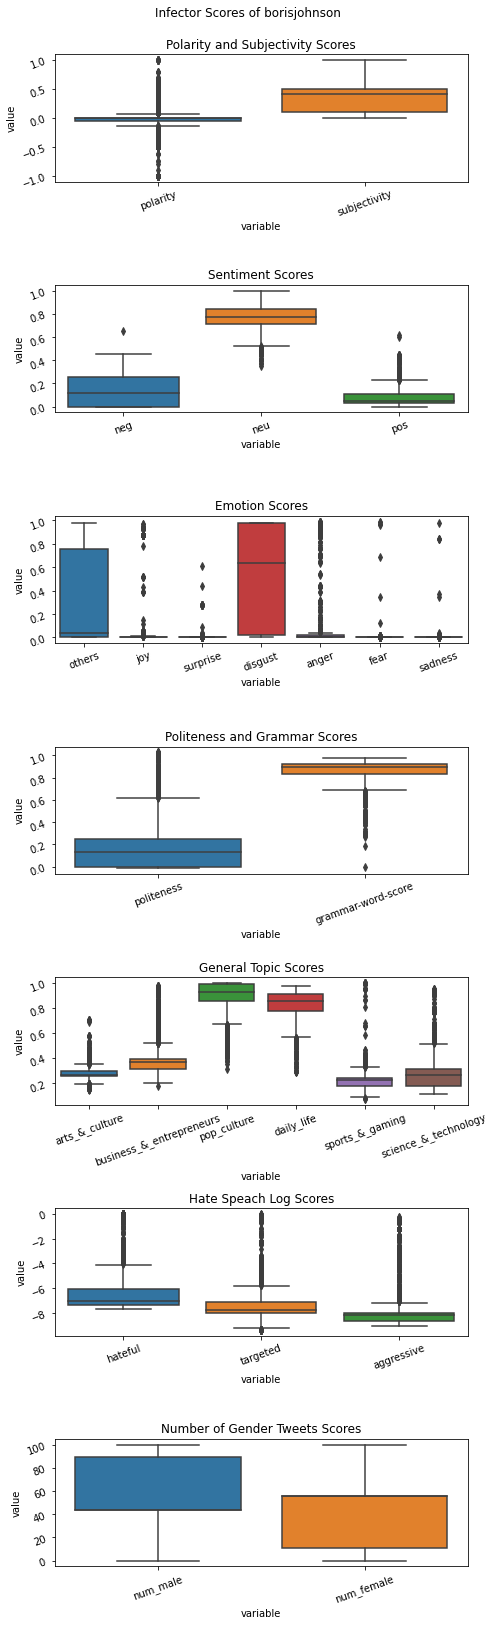

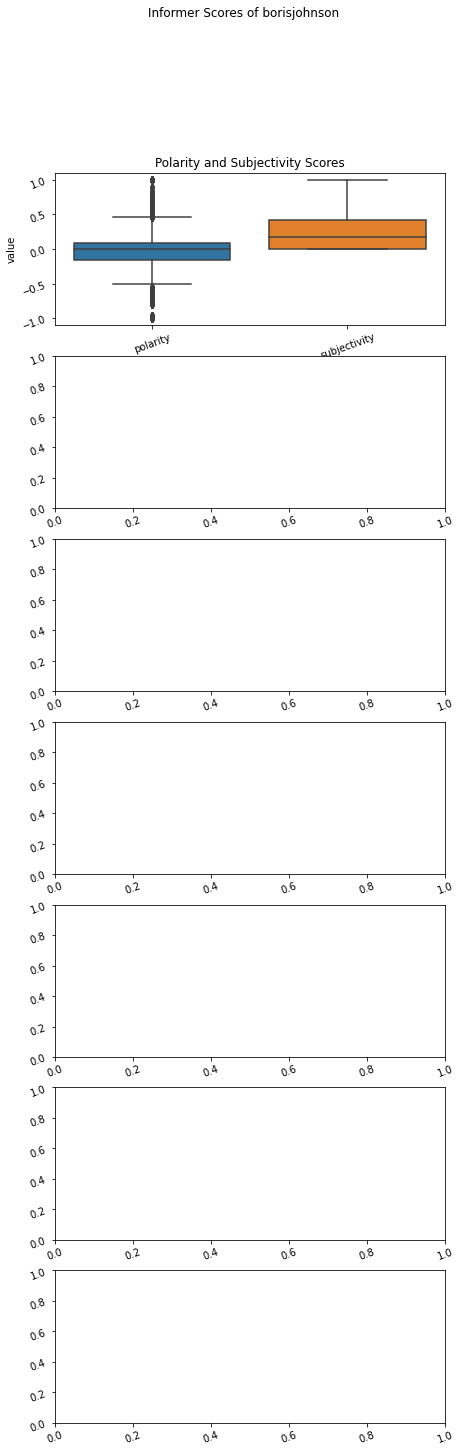

In [3]:
from pandas import plotting
import pandas as pd

%matplotlib inline

# hashtags = ['avengers','brexit','blm','borisjohnson','brexit','climatechange','covid','gaza','loveisland','monkeypox','nhs','olivianewtonjohn','supercup','UkraineWar']
hashtags = ['borisjohnson']

typ = ['infector','informer']


for hashtag in hashtags: 

    whole_df = pd.read_csv(f'multisource_analysis/data/{hashtag}_scored_tweets.csv')

    for t in typ:


        fig, axes = plt.subplots(7, 1, figsize=(7, 23))

        for ax in fig.axes:
            ax.tick_params(labelrotation=20)
        
        if t == 'infector':
            fig.suptitle(f'Infector Scores of {hashtag}\n\n')
        else: 
            fig.suptitle(f'Informer Scores of {hashtag}\n\n')


        df = whole_df.copy()[whole_df[f'is-{t}']==1]
        df.drop(['Unnamed: 0', 'target','is-target','is-infector','is-informer','text','hashtag','user_id'], inplace = True, axis =1)
        df.reset_index(inplace=True,drop=False)


        sent_df = df[['polarity','subjectivity']]
        sns.boxplot( x = "variable", y="value", data = pd.melt(sent_df), ax = axes[0]).set(title=f'Polarity and Subjectivity Scores')

        sent_df = df[['neg','neu','pos']]
        sns.boxplot( x = "variable", y="value", data = pd.melt(sent_df), ax = axes[1]).set(title=f'Sentiment Scores')

        emo_df = df[ ['others','joy','surprise','disgust','anger','fear','sadness'] ]
        sns.boxplot( x = "variable", y="value", data = pd.melt(emo_df), ax = axes[2]).set(title=f'Emotion Scores')

        pol_df = df[ ['politeness','grammar-word-score'] ]
        sns.boxplot( x = "variable", y="value", data = pd.melt(pol_df), ax = axes[3]).set(title=f'Politeness and Grammar Scores')

        topic_df = df[ ['arts_&_culture', 'business_&_entrepreneurs',  'pop_culture',  'daily_life',  'sports_&_gaming',  'science_&_technology'] ]
        sns.boxplot( x = "variable", y="value", data = pd.melt(topic_df), ax = axes[4]).set(title=f'General Topic Scores')

        h_df = np.log2(df[ ['hateful', 'targeted', 'aggressive'] ])
        sns.boxplot( x = "variable", y="value", data = pd.melt(h_df), ax = axes[5]).set(title=f'Hate Speach Log Scores')

        g_df = df[['num_male','num_female']]
        sns.boxplot( x = "variable", y="value", data = pd.melt(g_df), ax = axes[6]).set(title=f'Number of Gender Tweets Scores')

        # r_df = df[['ARI','LIX','RIX','Kincaid','Coleman-Liau','DaleChallIndex','FleschReadingEase','GunningFogIndex','SMOGIndex']]
        # sns.boxplot( x = "variable", y="value", data = pd.melt(r_df), ax = axes[7]).set(title=f'Readability Scores')


        print(f'added {hashtag} to consideration')

        # set the spacing between subplots
        fig.tight_layout()
        # plt.show()


        fig.savefig(f'multisource_analysis/figures/{t}_{hashtag}_scores.png', bbox_inches='tight', pad_inches = 0, facecolor='w')


# BOXPLOTS OF USER SCORES

added avengers to consideration
added avengers to consideration
added avengers to consideration
added blm to consideration
added blm to consideration
added blm to consideration
added brexit to consideration
added brexit to consideration
added brexit to consideration
added climatechange to consideration
added climatechange to consideration
added climatechange to consideration
added covid to consideration
added covid to consideration
added covid to consideration
added gaza to consideration
added gaza to consideration
added gaza to consideration
added loveisland to consideration
added loveisland to consideration


C:\Users\berke\AppData\Local\Temp\ipykernel_37716\1378304353.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(5, 1, figsize=(6, 14))


added loveisland to consideration
added monkeypox to consideration
added monkeypox to consideration
added monkeypox to consideration
added nhs to consideration
added nhs to consideration
added nhs to consideration
added olivianewtonjohn to consideration
added olivianewtonjohn to consideration
added olivianewtonjohn to consideration
added supercup to consideration
added supercup to consideration
added supercup to consideration
added UkraineWar to consideration
added UkraineWar to consideration
added UkraineWar to consideration


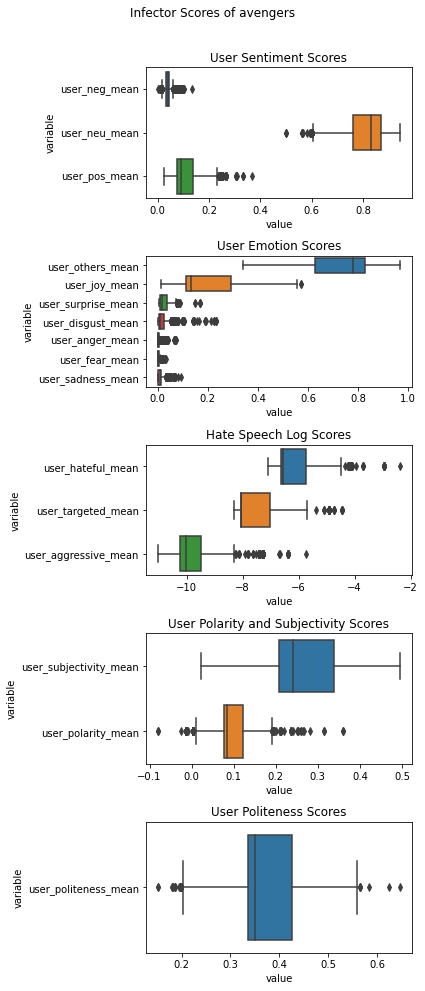

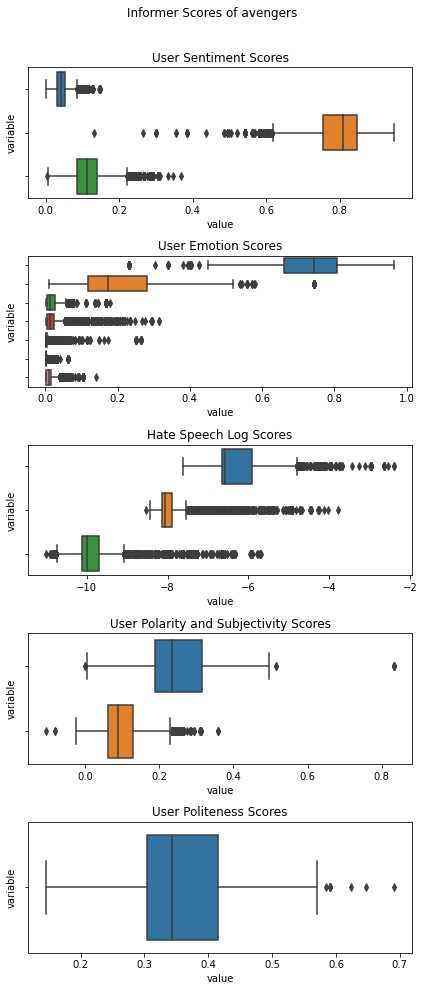

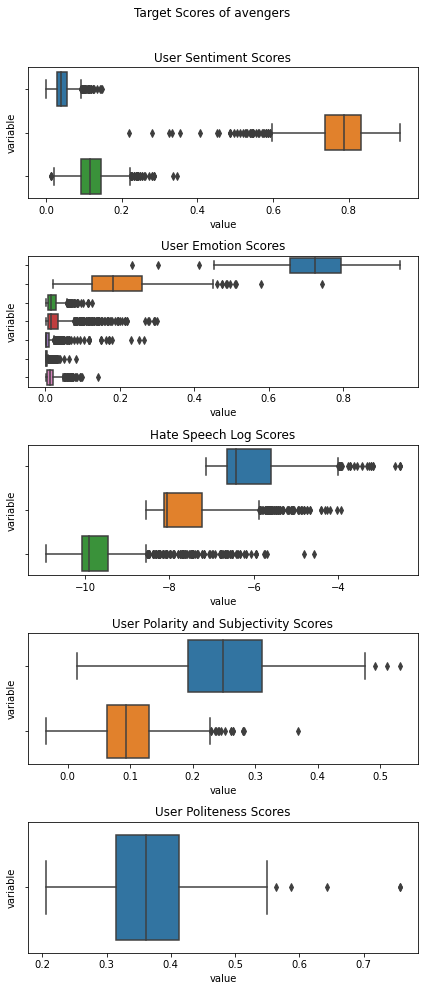

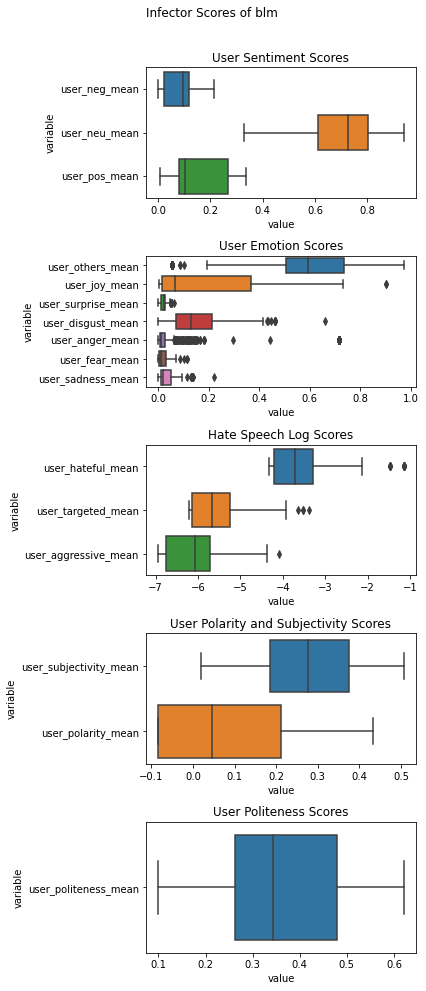

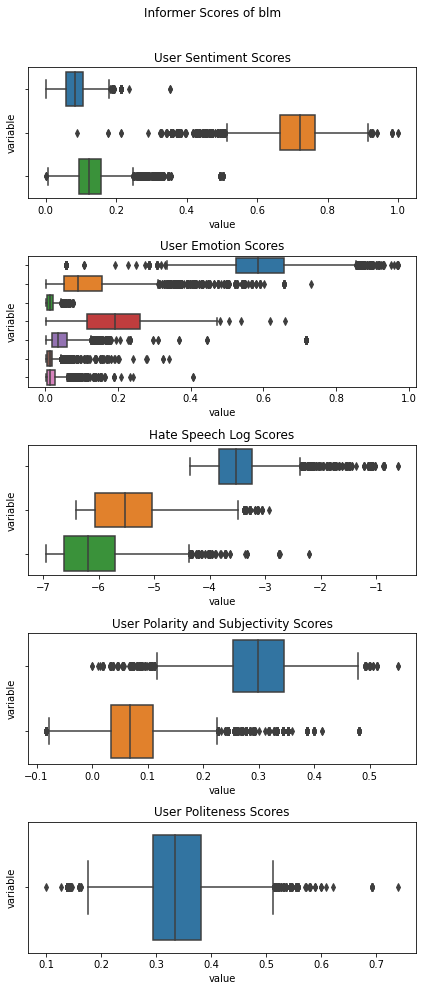

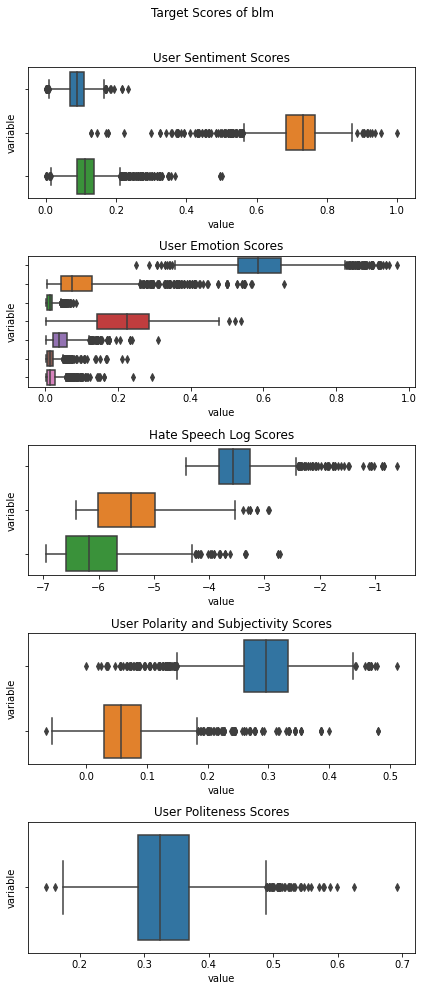

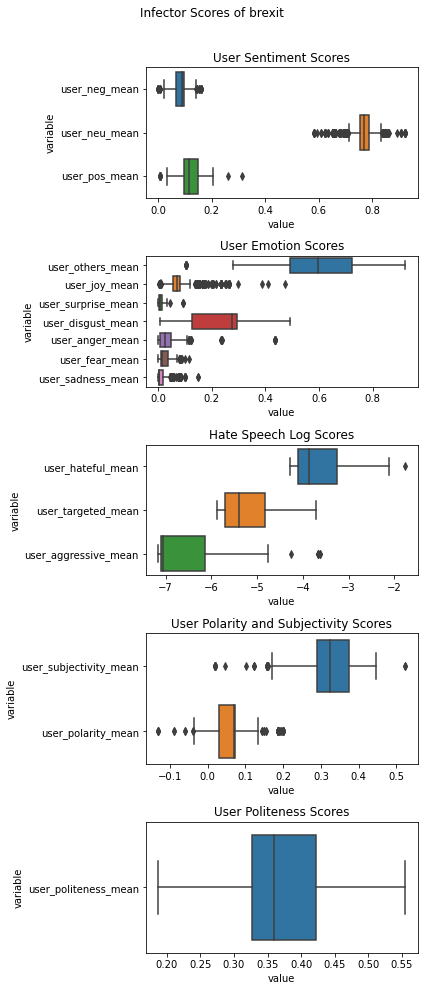

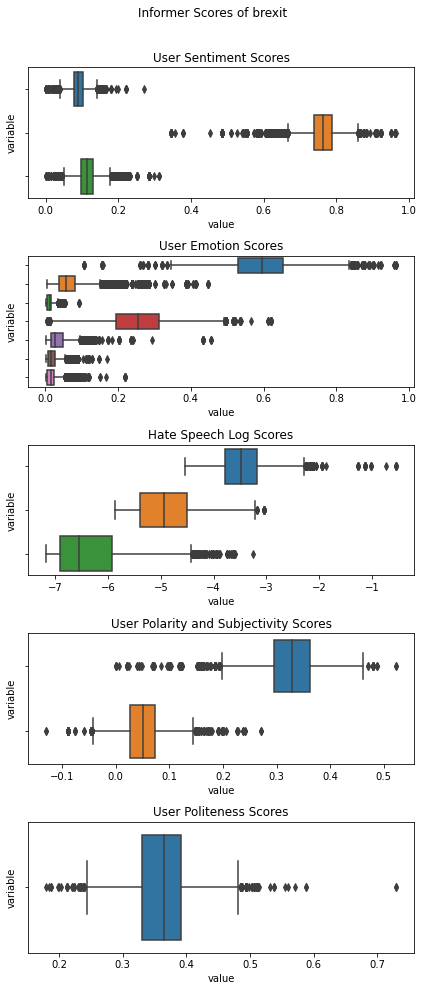

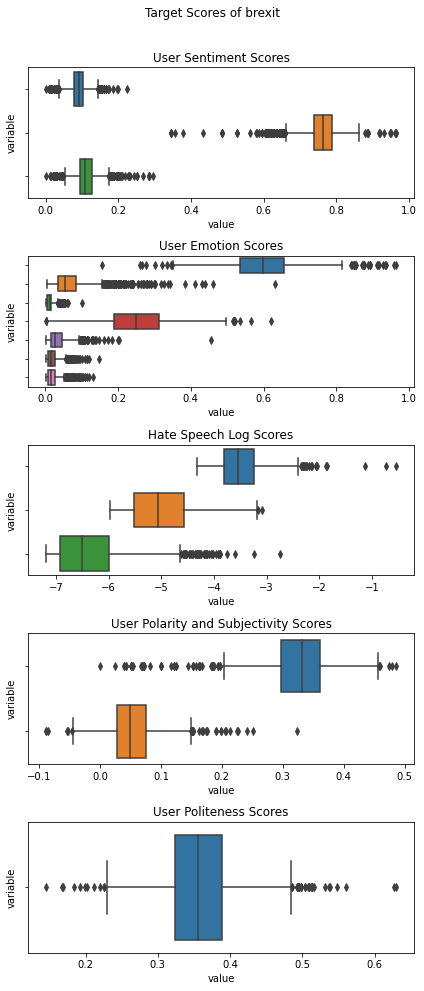

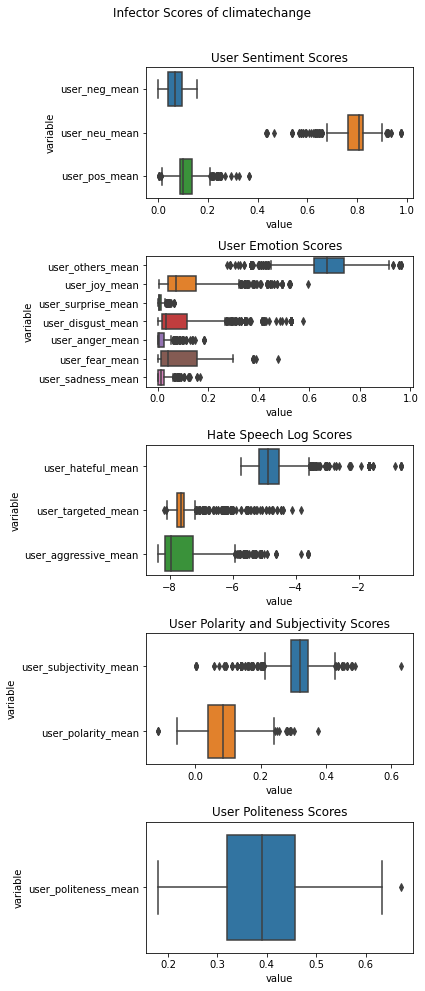

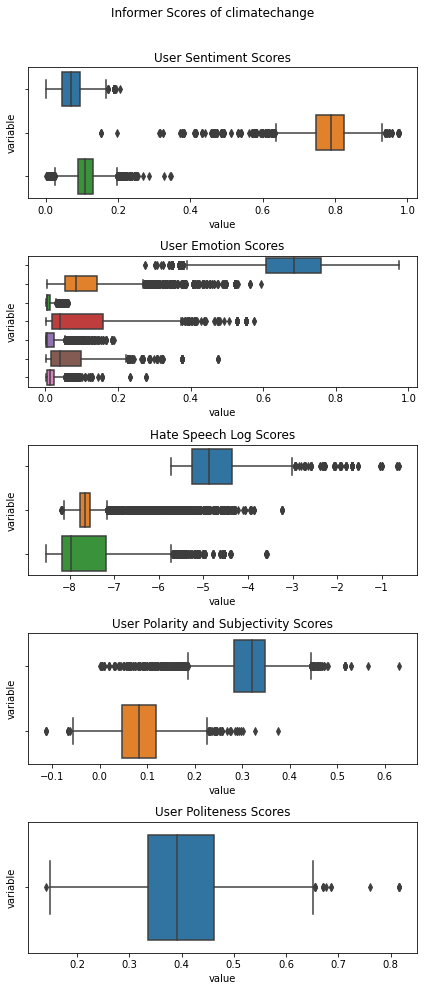

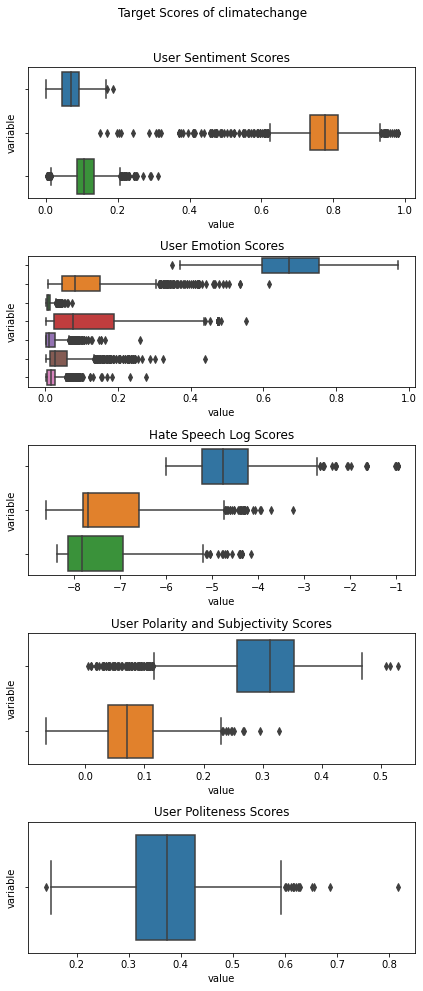

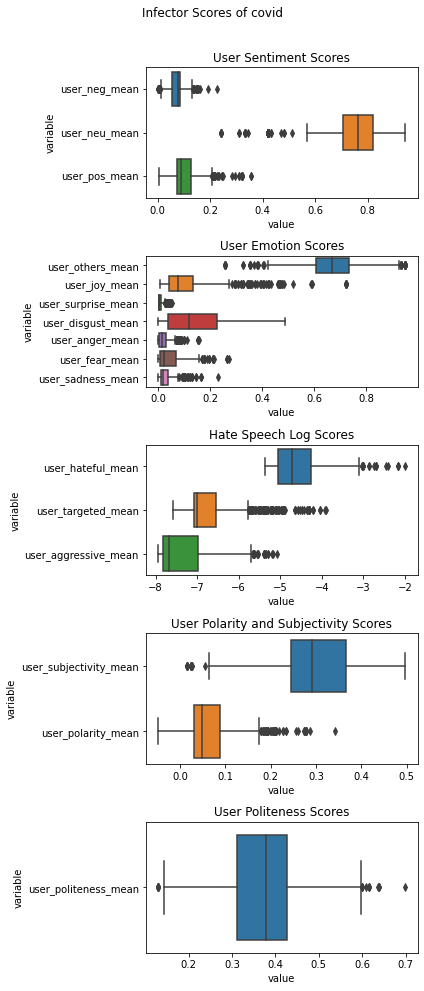

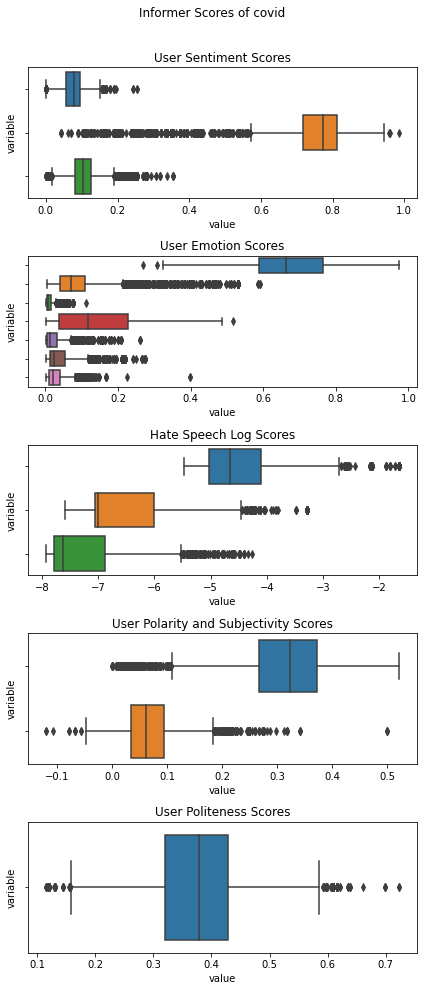

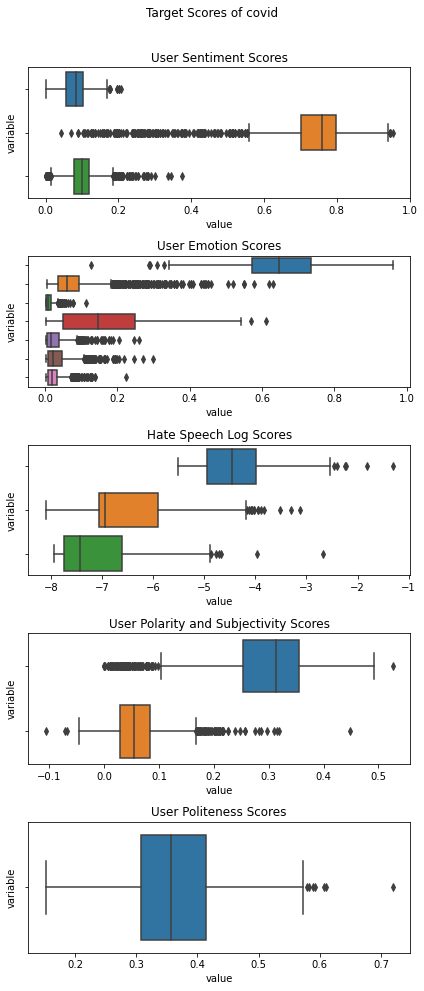

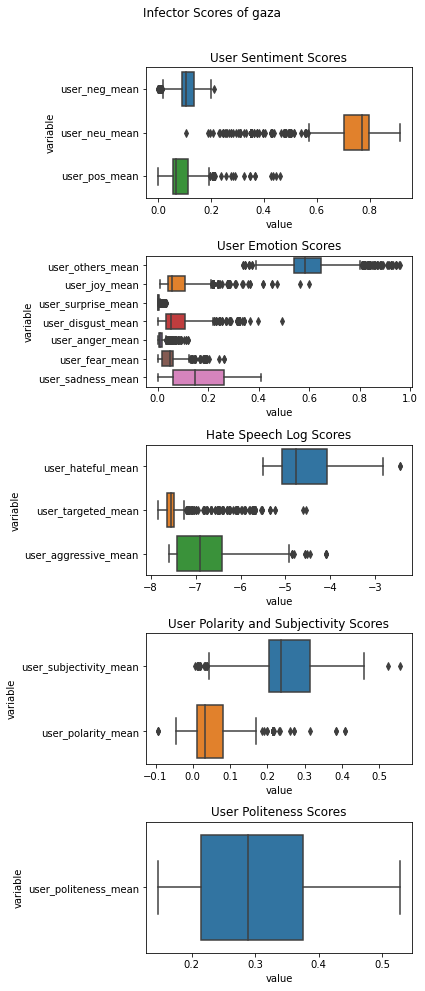

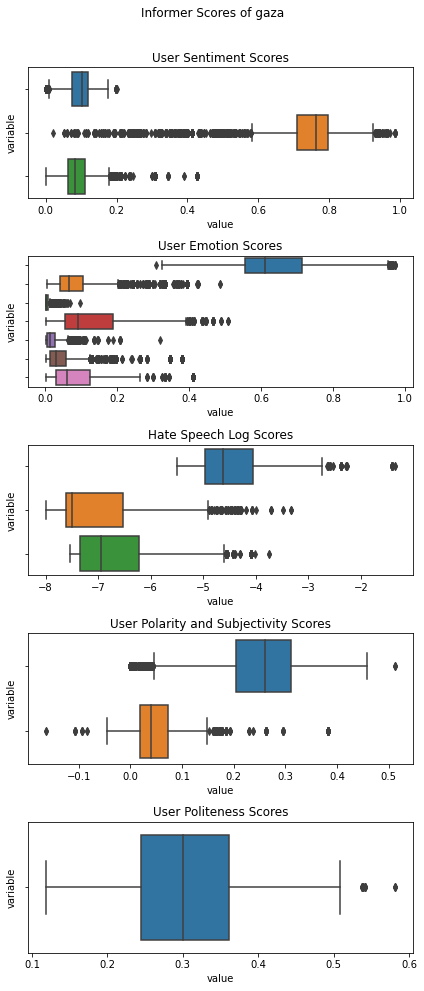

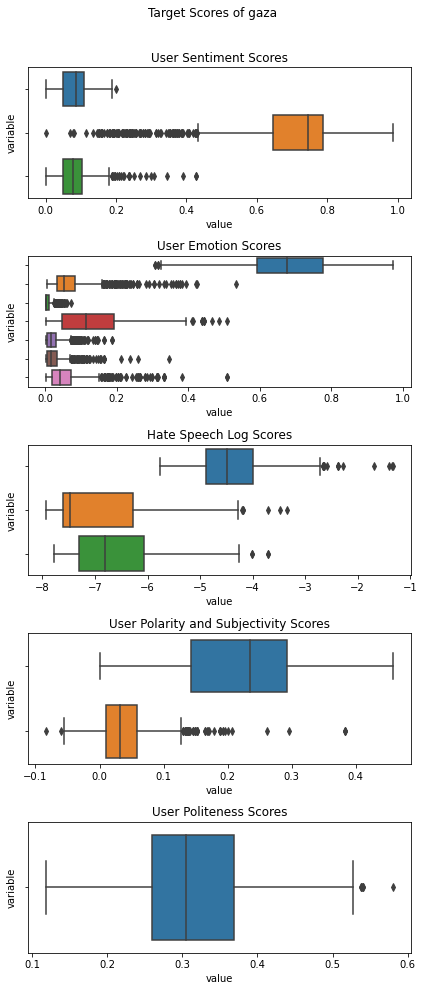

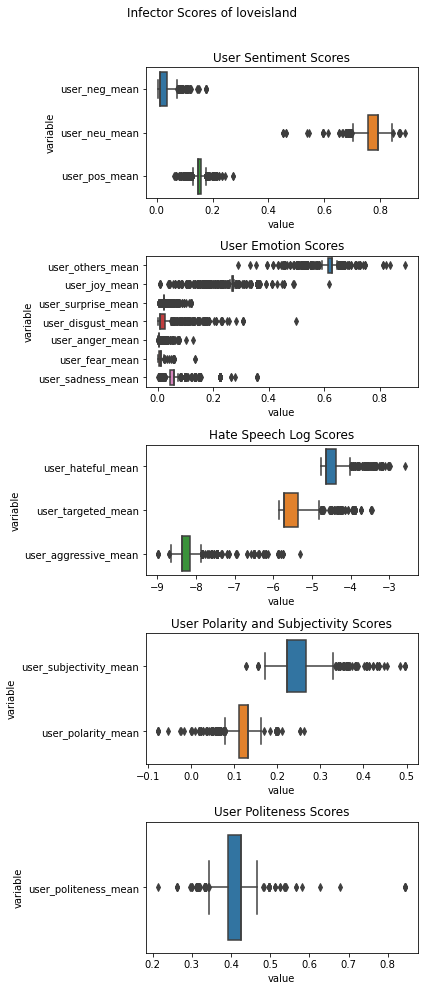

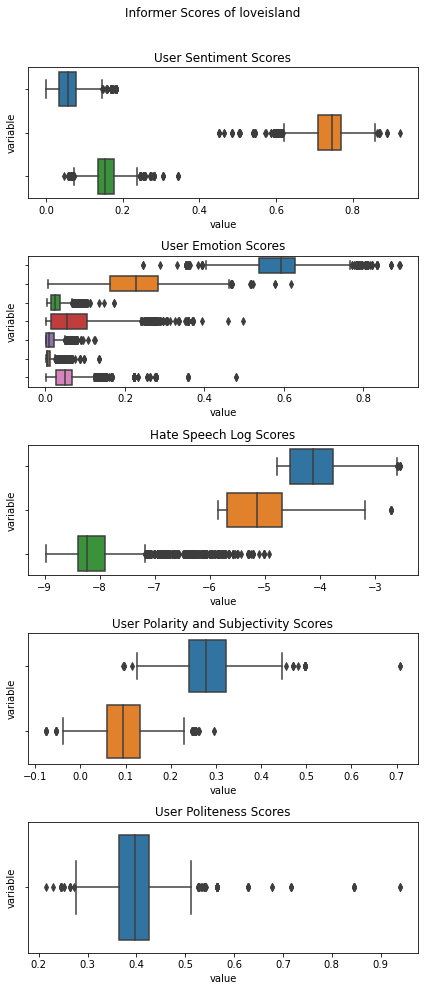

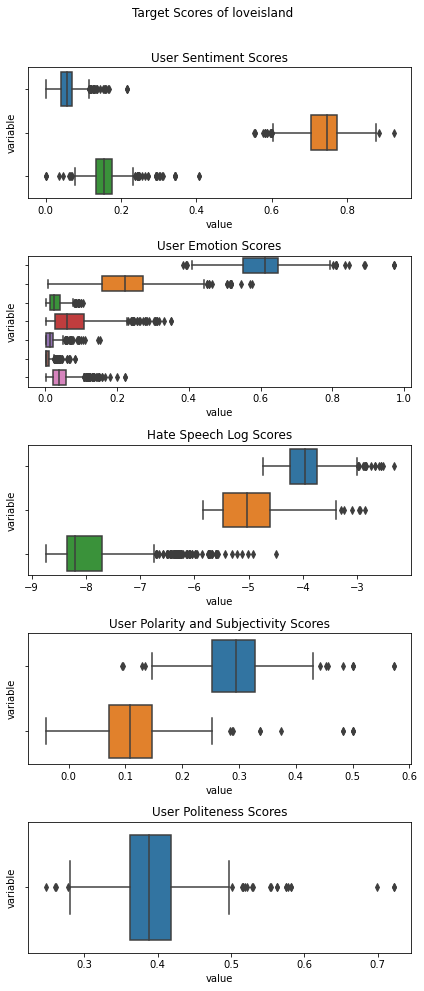

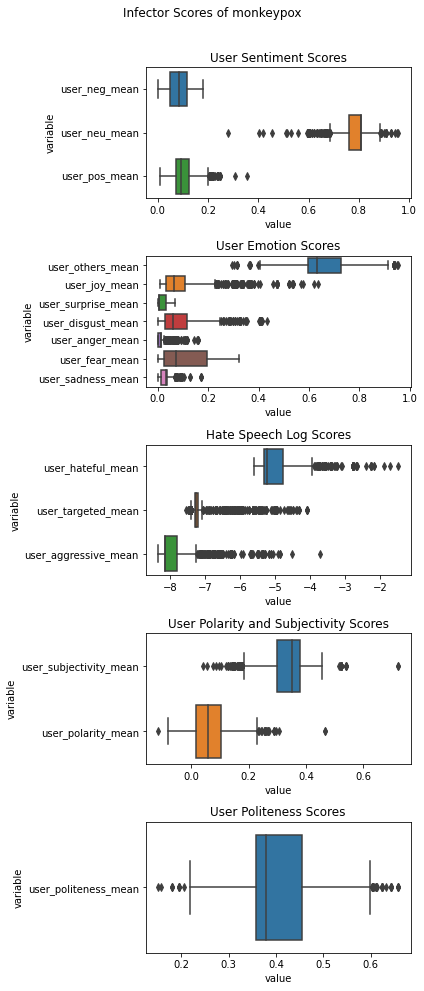

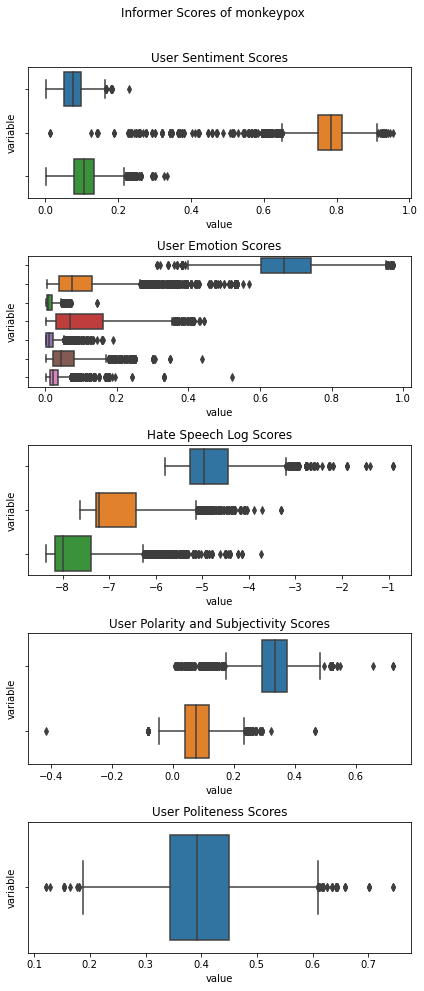

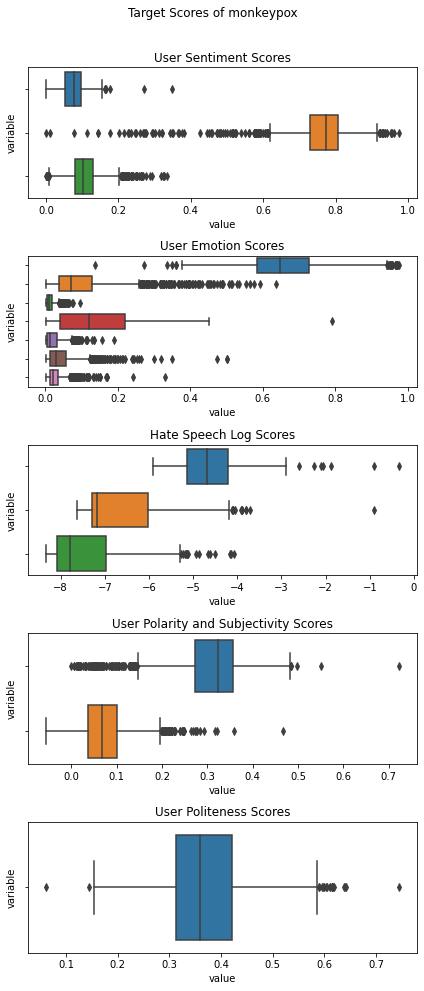

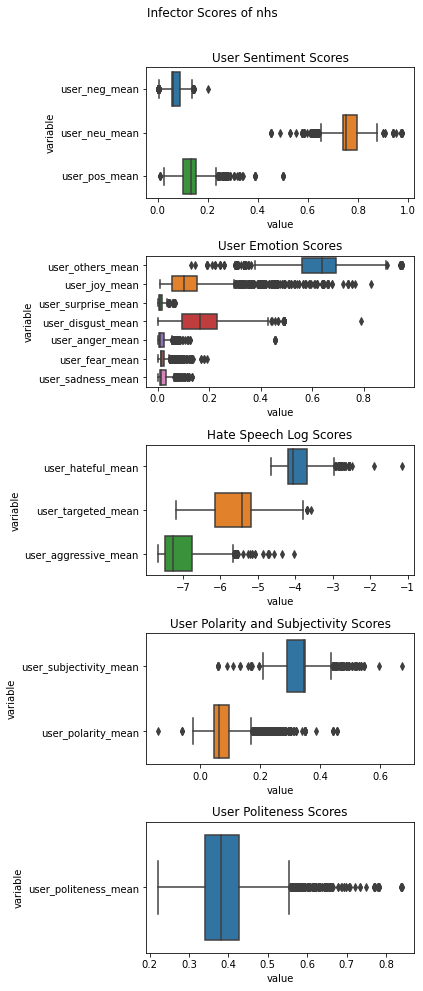

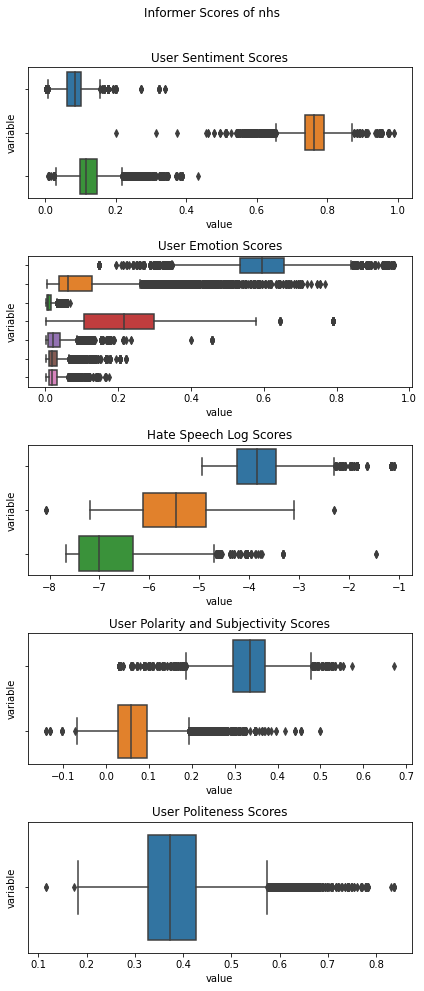

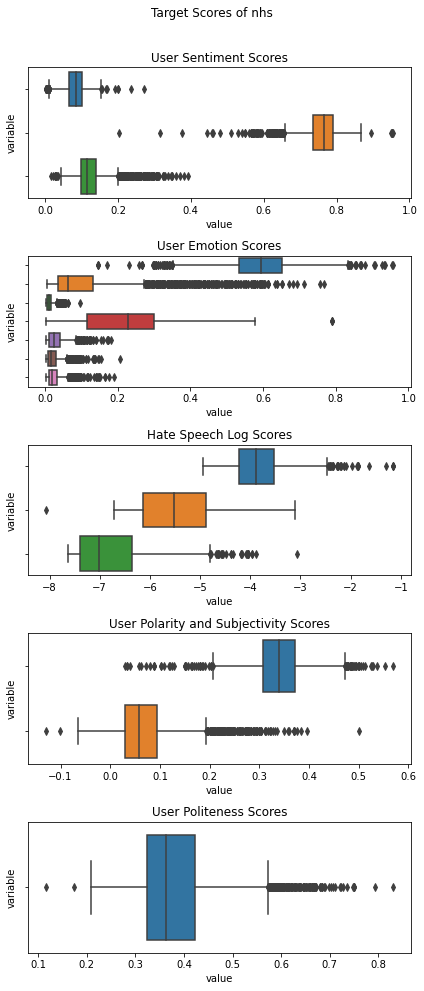

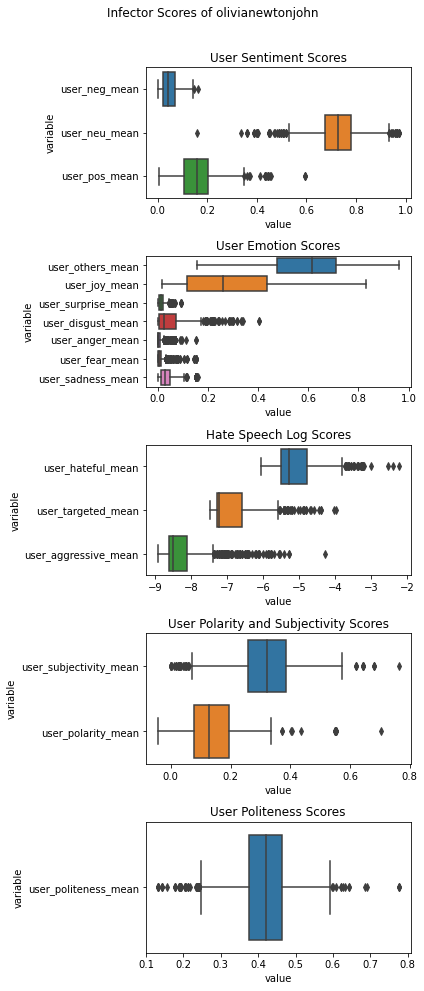

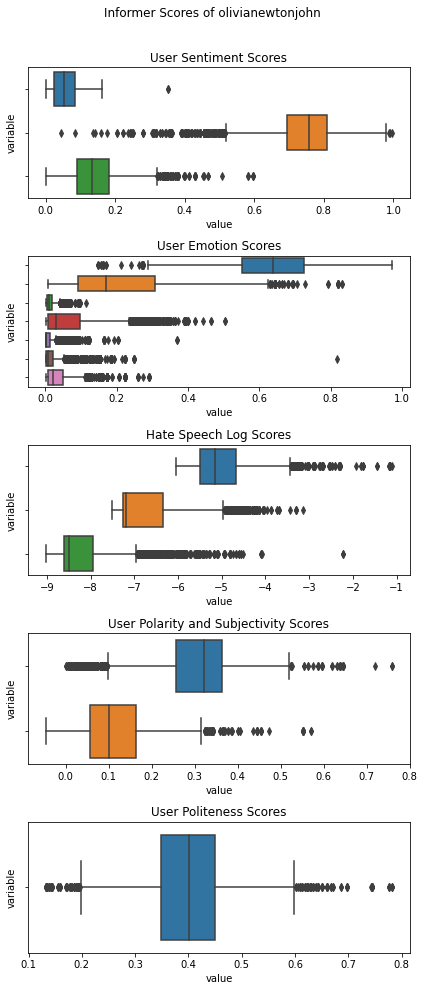

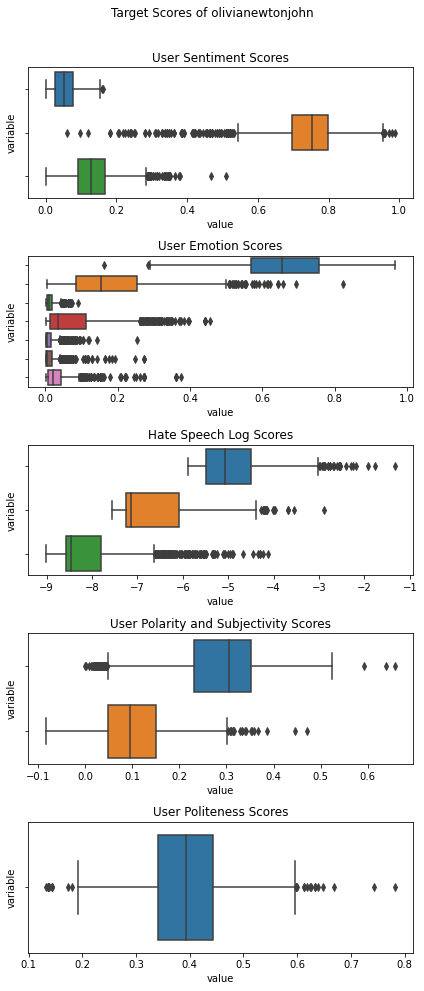

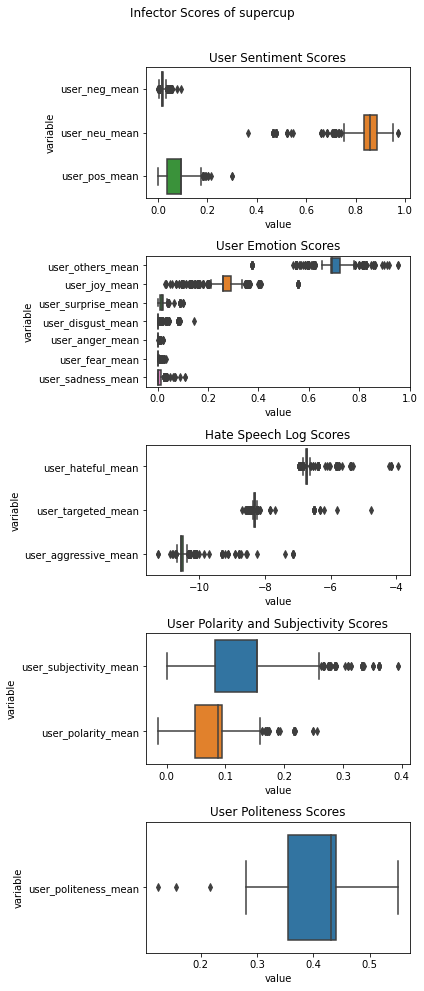

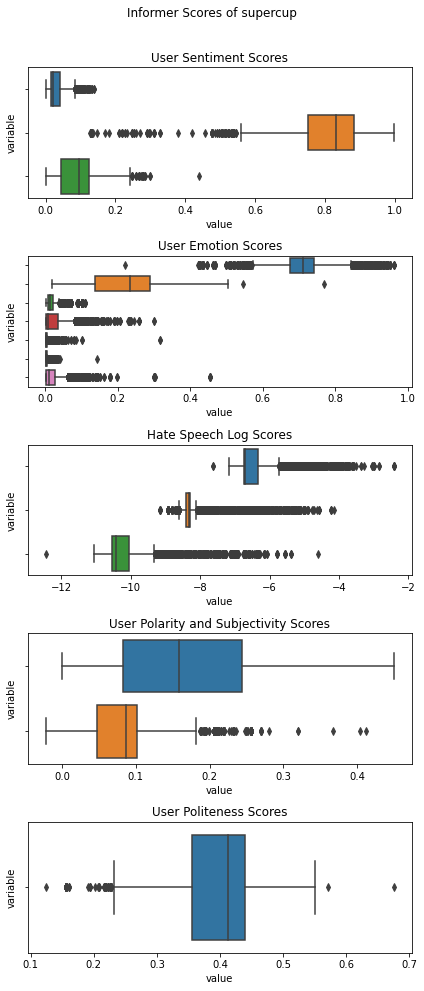

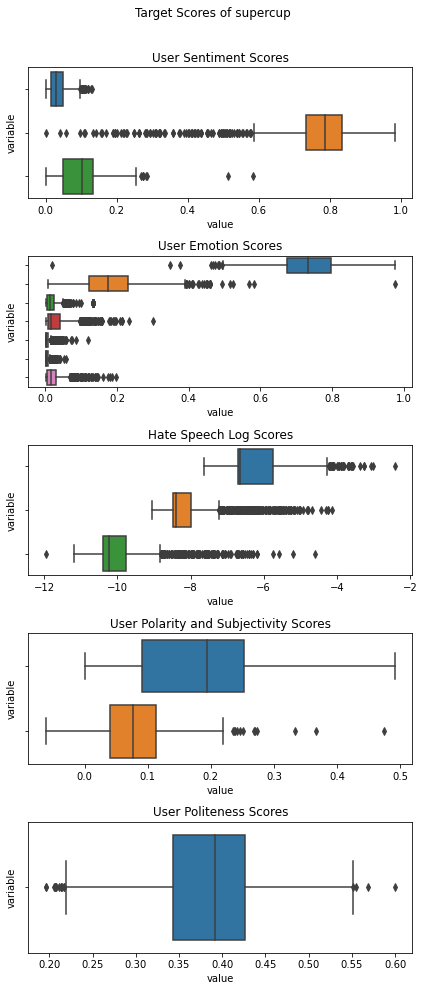

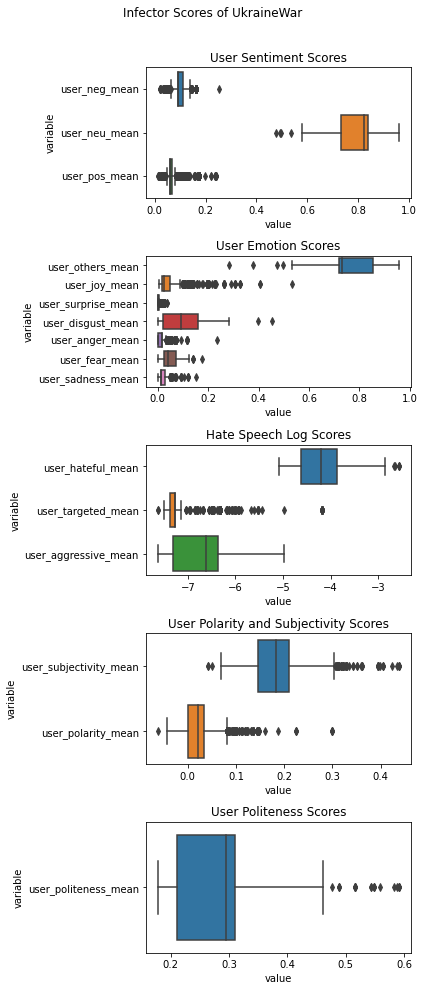

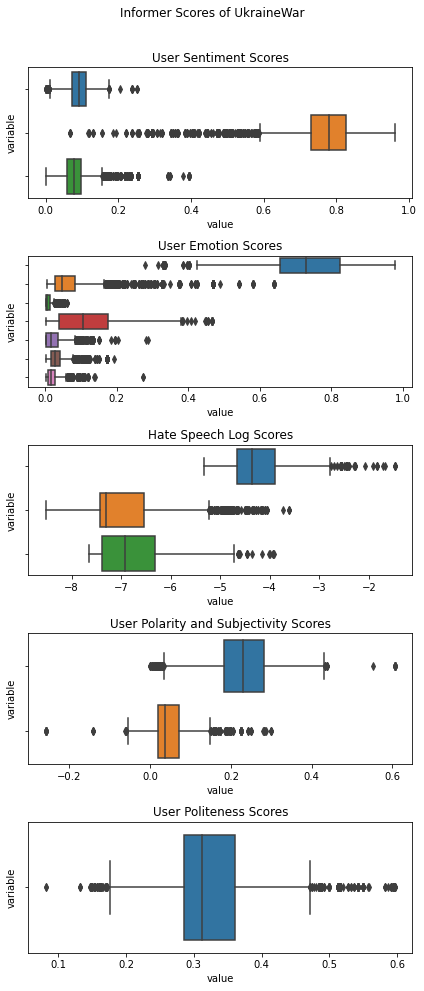

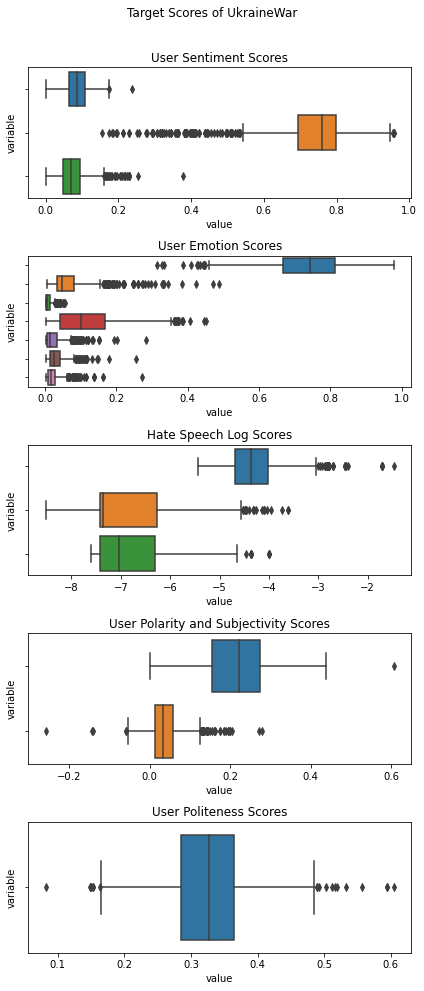

In [8]:
from pandas import plotting
import pandas as pd

%matplotlib inline

hashtags = ['avengers','blm','brexit','climatechange','covid','gaza','loveisland','monkeypox','nhs','olivianewtonjohn','supercup','UkraineWar']
# hashtags = ['avengers']

typ = ['infector','informer','target']


for hashtag in hashtags: 

    whole_df = pd.read_csv(f'multisource_analysis/user_ft_data/{hashtag}_scored_tweets.csv')

    for i_t, t in enumerate(typ):


        fig, axes = plt.subplots(5, 1, figsize=(6, 14))
        
        if t == 'infector':
            fig.suptitle(f'Infector Scores of {hashtag}\n\n')
        elif t== 'target': 
            fig.suptitle(f'Target Scores of {hashtag}\n\n')
        else: 
            fig.suptitle(f'Informer Scores of {hashtag}\n\n')


        df = whole_df.copy()[whole_df[f'is-{t}']==1]
        df.drop(['Unnamed: 0', 'target','is-target','is-infector','is-informer','text','hashtag','user_id'], inplace = True, axis =1)
        df.reset_index(inplace=True,drop=False)



        sent_df = df[['user_neg_mean','user_neu_mean','user_pos_mean']]
        f1 = sns.boxplot( x = "value", y="variable", data = pd.melt(sent_df), ax = axes[0], orient='h')
        f1.set(title=f'User Sentiment Scores')
        if t != 'infector':
            f1.set(yticklabels=[])


        emo_df = df[ ['user_others_mean','user_joy_mean','user_surprise_mean','user_disgust_mean','user_anger_mean','user_fear_mean','user_sadness_mean'] ]
        f1 = sns.boxplot( x = "value", y="variable", data = pd.melt(emo_df), ax = axes[1], orient='h')
        f1.set(title=f'User Emotion Scores')
        if t != 'infector':
            f1.set(yticklabels=[])

        h_df = np.log2(df[ ['user_hateful_mean', 'user_targeted_mean', 'user_aggressive_mean'] ])
        f1 = sns.boxplot( x = "value", y="variable", orient='h', data = pd.melt(h_df), ax = axes[2])
        f1.set(title=f'Hate Speech Log Scores')
        if t != 'infector':
            f1.set(yticklabels=[])

        pol_df = df[ ['user_subjectivity_mean', 'user_polarity_mean'] ]
        f1 = sns.boxplot( x = "value", y="variable", orient='h', data = pd.melt(pol_df), ax = axes[3])
        f1.set(title=f'User Polarity and Subjectivity Scores')
        if t != 'infector':
            f1.set(yticklabels=[])


        pol_df = df[ ['user_politeness_mean'] ]
        f1 = sns.boxplot( x = "value", y="variable", orient='h', data = pd.melt(pol_df), ax = axes[4])
        f1.set(title=f'User Politeness Scores')
        if t != 'infector':
            f1.set(yticklabels=[])

        print(f'added {hashtag} to consideration')

        # set the spacing between subplots
        fig.tight_layout()
        # plt.show()

        fig.savefig(f'multisource_analysis/user_ft_data/figs/{t}_{hashtag}_scores.png', bbox_inches='tight', pad_inches = 0, facecolor='w')


added avengers to consideration
added avengers to consideration
added avengers to consideration
added blm to consideration
added blm to consideration
added blm to consideration
added brexit to consideration
added brexit to consideration
added brexit to consideration
added climatechange to consideration
added climatechange to consideration
added climatechange to consideration
added covid to consideration
added covid to consideration
added covid to consideration
added gaza to consideration
added gaza to consideration
added gaza to consideration
added loveisland to consideration
added loveisland to consideration


C:\Users\berke\AppData\Local\Temp\ipykernel_15324\2035009475.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(1, 1, figsize=(10, 5))


added loveisland to consideration
added monkeypox to consideration
added monkeypox to consideration
added monkeypox to consideration
added nhs to consideration
added nhs to consideration
added nhs to consideration
added olivianewtonjohn to consideration
added olivianewtonjohn to consideration
added olivianewtonjohn to consideration
added supercup to consideration
added supercup to consideration
added supercup to consideration
added UkraineWar to consideration
added UkraineWar to consideration
added UkraineWar to consideration


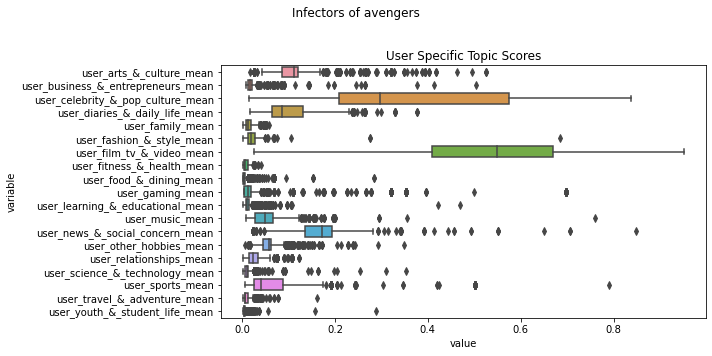

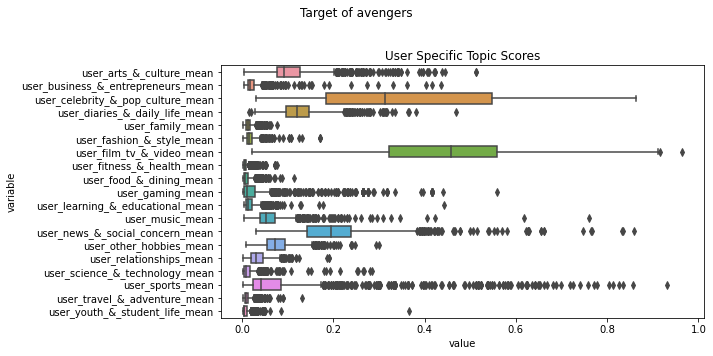

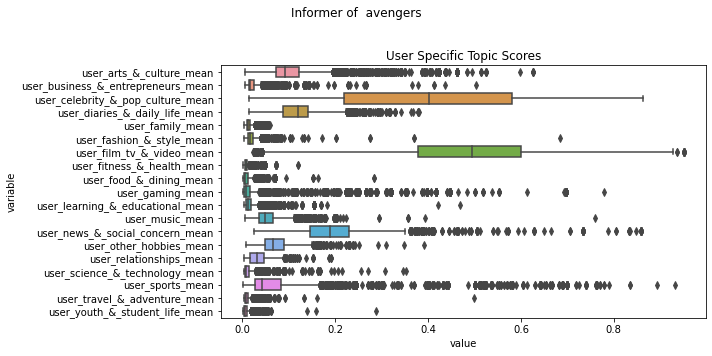

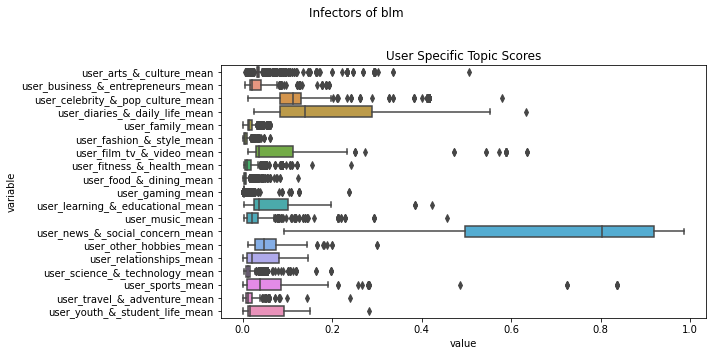

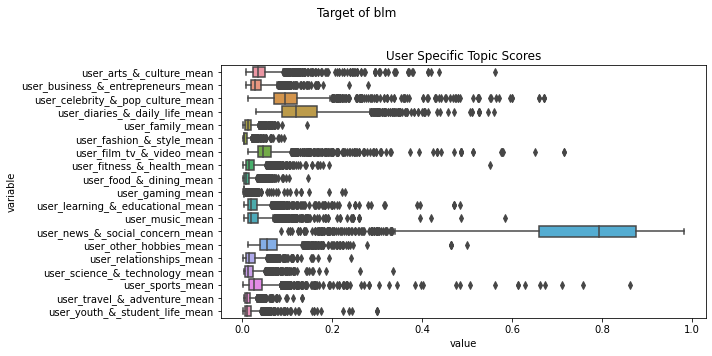

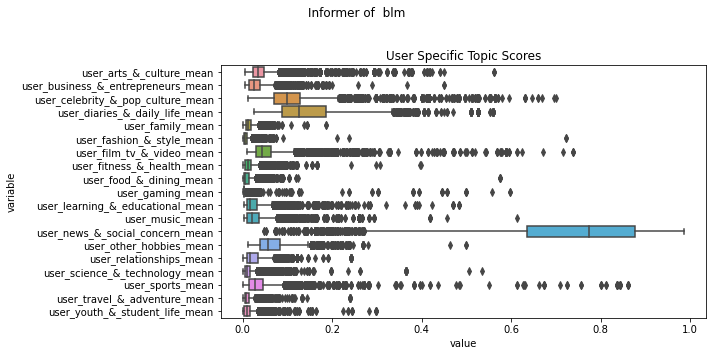

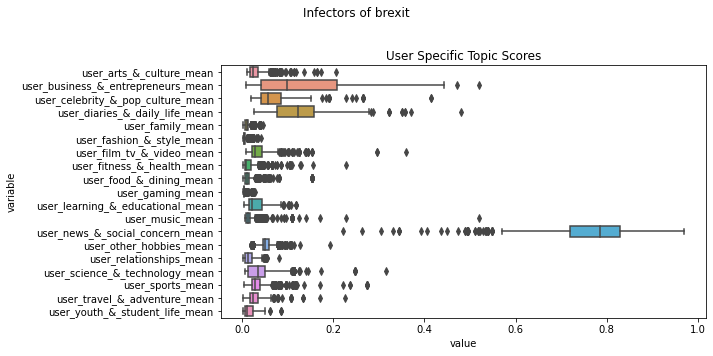

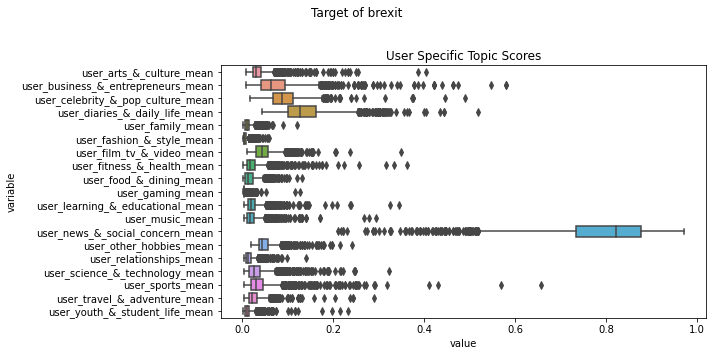

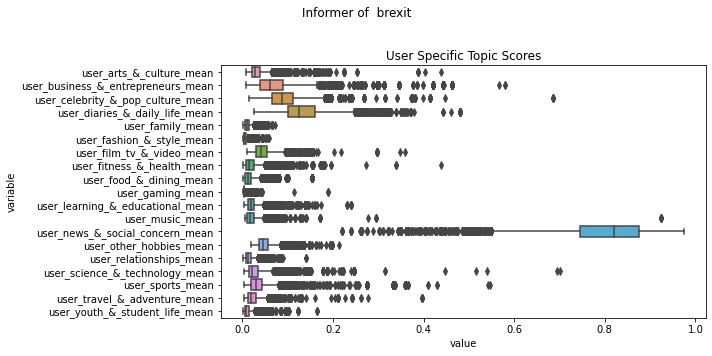

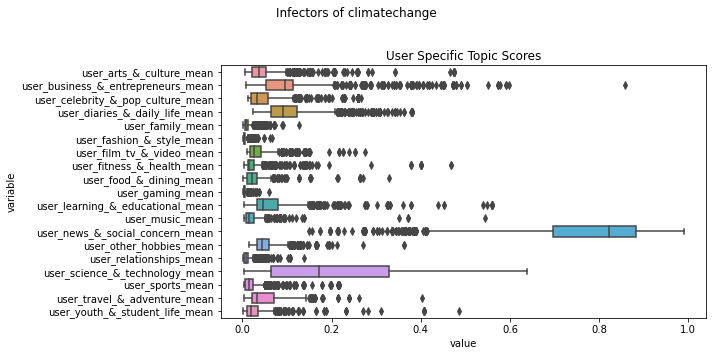

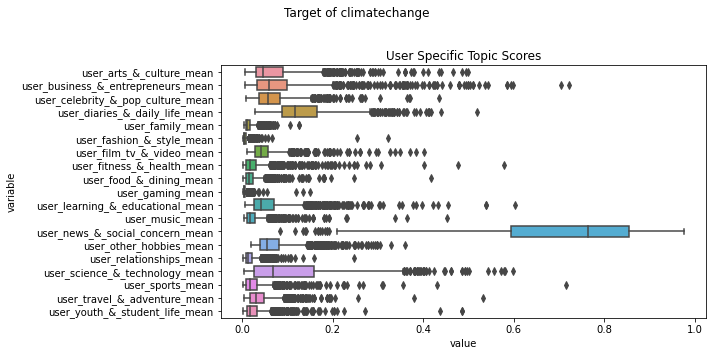

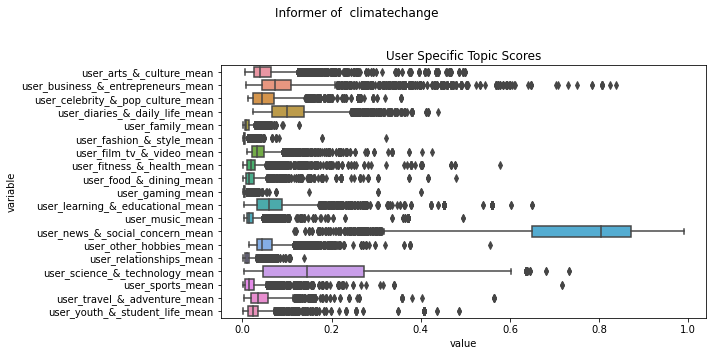

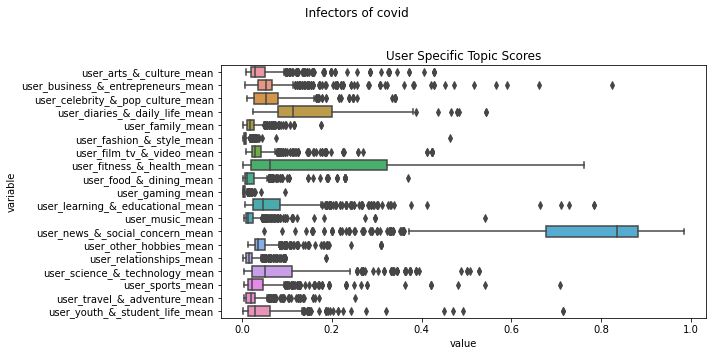

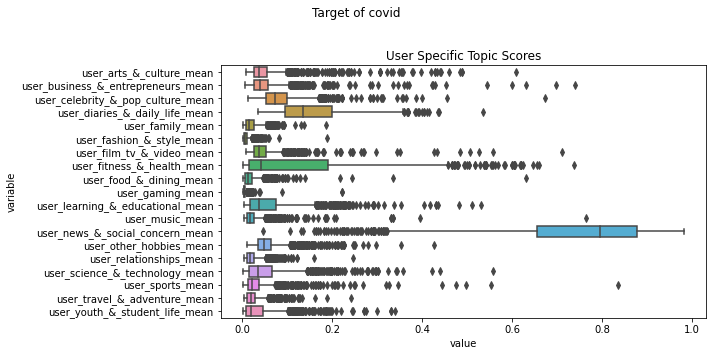

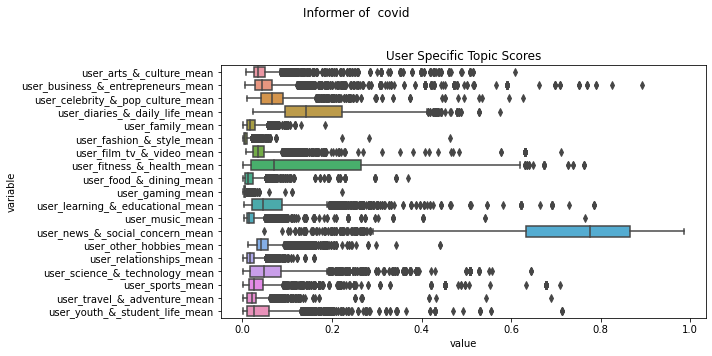

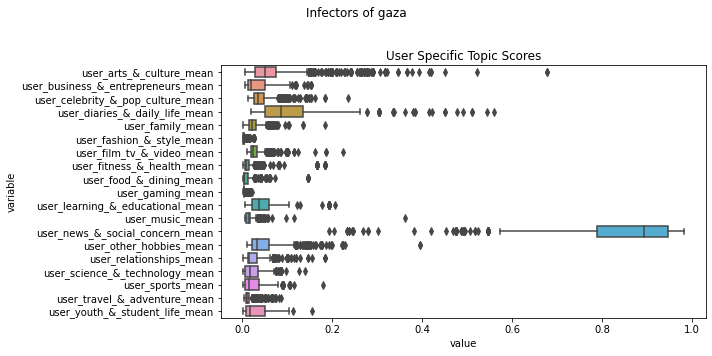

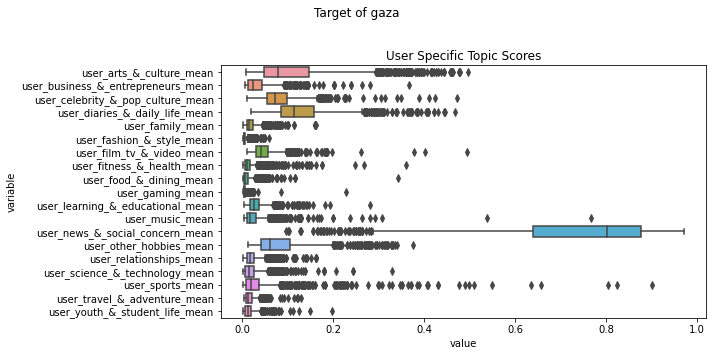

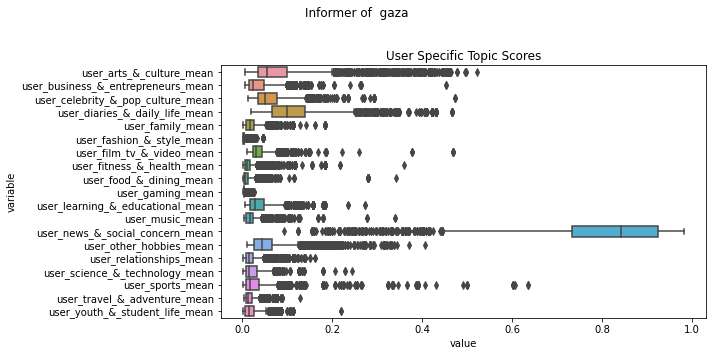

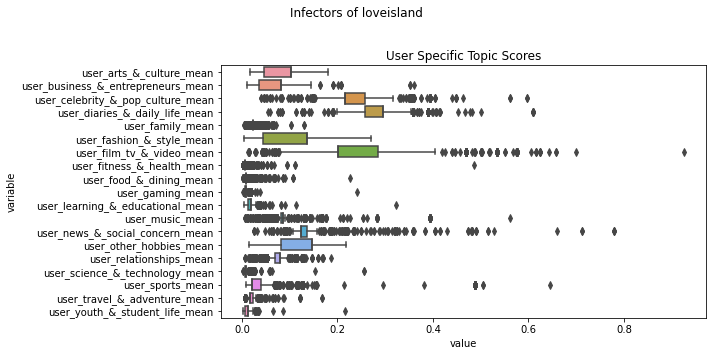

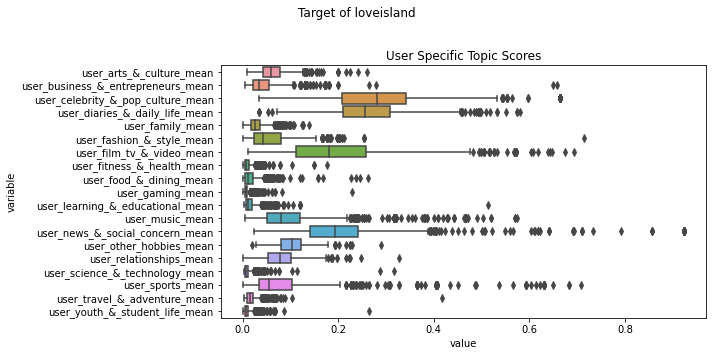

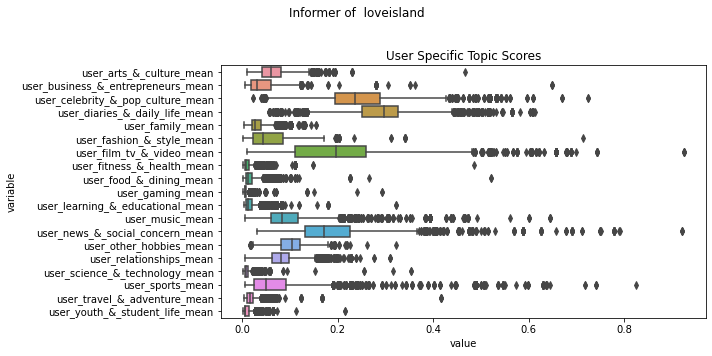

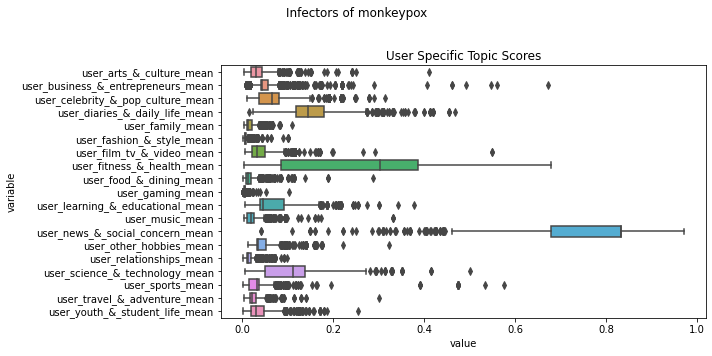

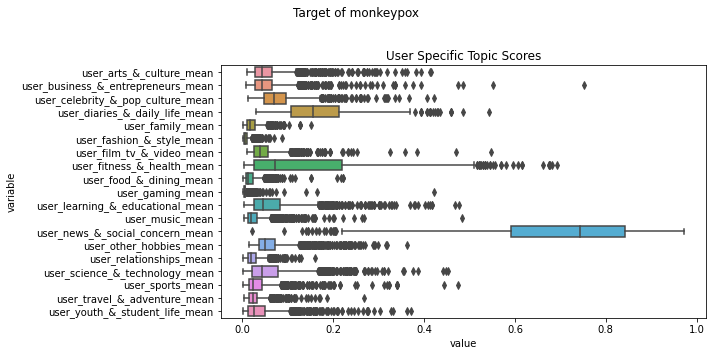

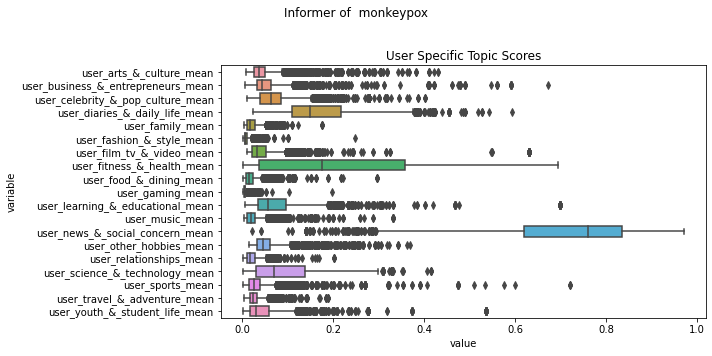

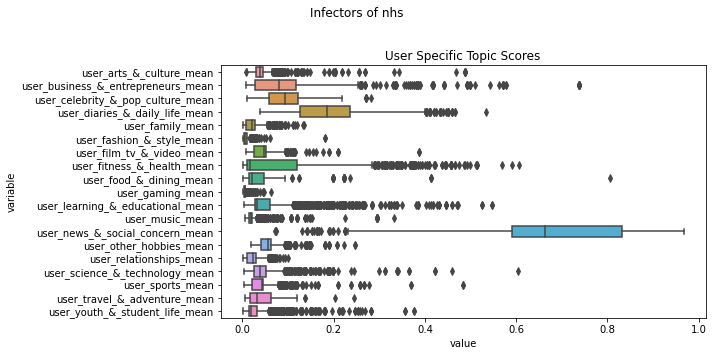

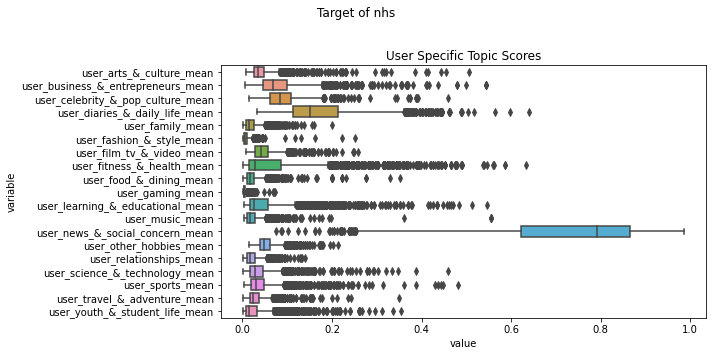

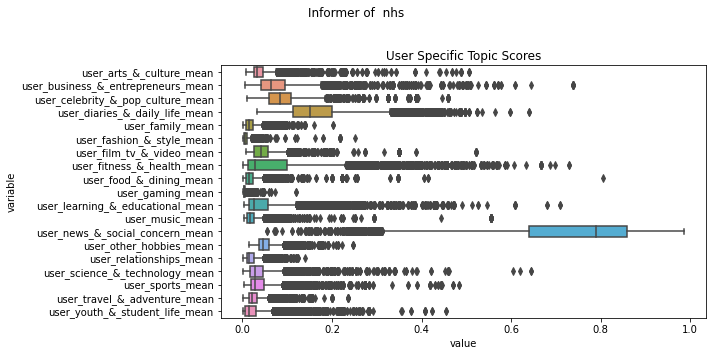

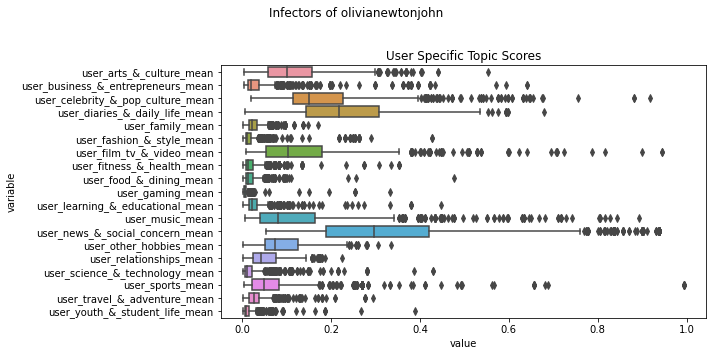

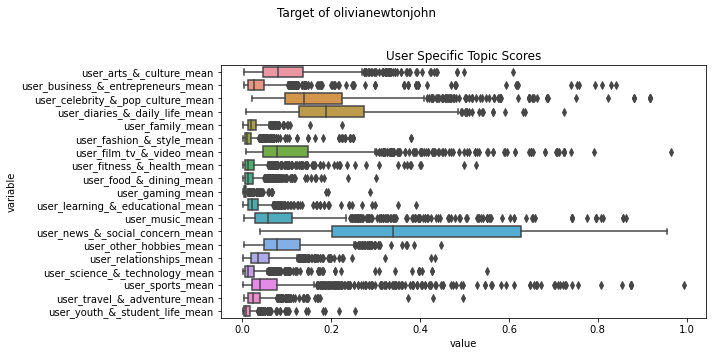

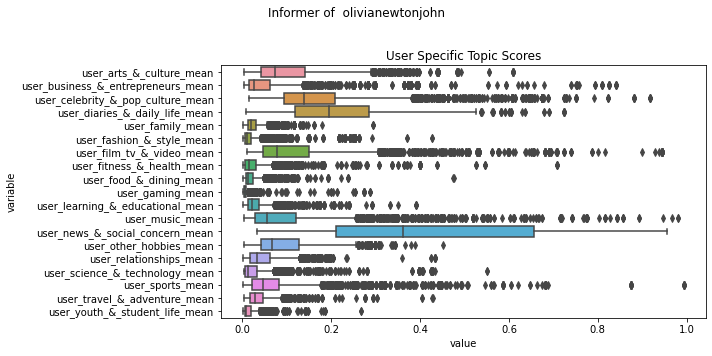

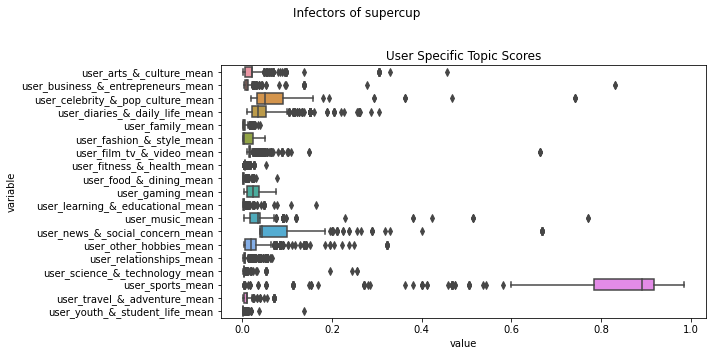

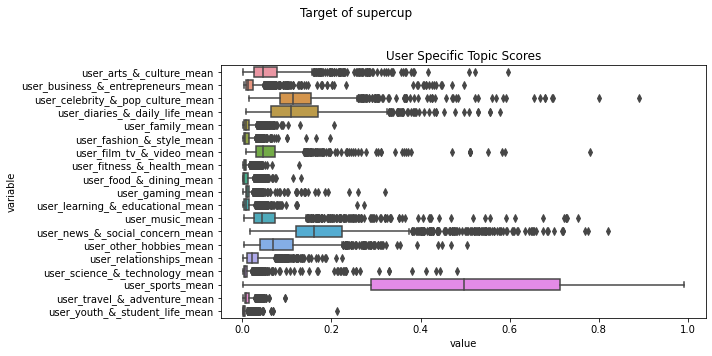

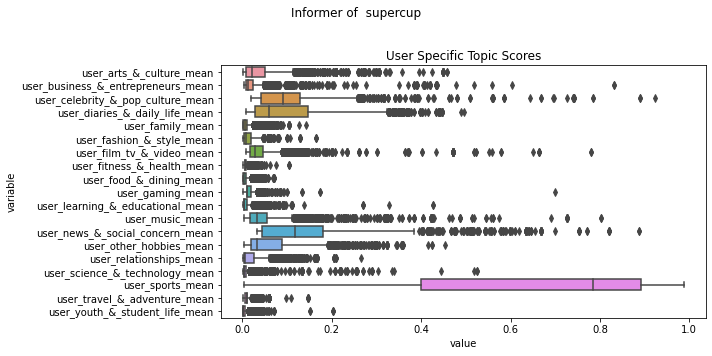

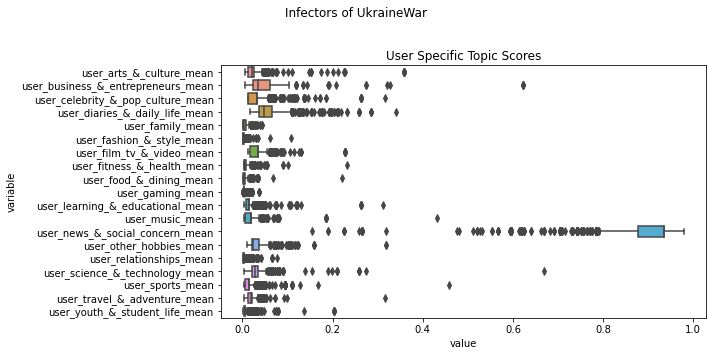

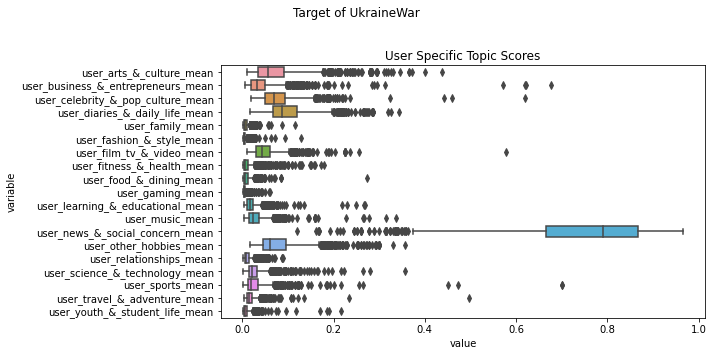

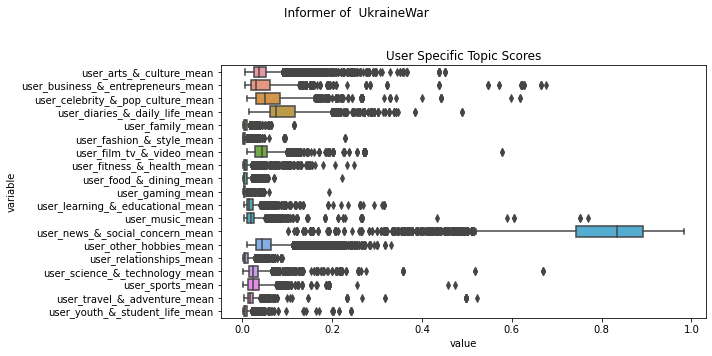

In [38]:
from pandas import plotting
import pandas as pd

%matplotlib inline

hashtags = ['avengers','blm','brexit','climatechange','covid','gaza','loveisland','monkeypox','nhs','olivianewtonjohn','supercup','UkraineWar']
# hashtags = ['avengers']

typ = ['infector','target','informer']


for hashtag in hashtags: 

    whole_df = pd.read_csv(f'multisource_analysis/user_ft_data/{hashtag}_scored_tweets.csv')

    for i_t,t in enumerate(typ):  

        df = whole_df.copy()[whole_df[f'is-{t}']==1]
        df.drop(['Unnamed: 0', 'target','is-target','is-infector','is-informer','text','hashtag','user_id'], inplace = True, axis =1)
        df.reset_index(inplace=True,drop=False)


        fig, axes = plt.subplots(1, 1, figsize=(10, 5))

        if t=='infector':
            fig.suptitle(f'Infectors of {hashtag}\n')
        elif t=='target':
            fig.suptitle(f'Target of {hashtag}\n')
        else:
            fig.suptitle(f'Informer of  {hashtag}\n')


        topic_df = df[ ['user_arts_&_culture_mean',
        'user_business_&_entrepreneurs_mean',
        'user_celebrity_&_pop_culture_mean',
        'user_diaries_&_daily_life_mean',
        'user_family_mean',
        'user_fashion_&_style_mean',
        'user_film_tv_&_video_mean',
        'user_fitness_&_health_mean',
        'user_food_&_dining_mean',
        'user_gaming_mean',
        'user_learning_&_educational_mean',
        'user_music_mean',
        'user_news_&_social_concern_mean',
        'user_other_hobbies_mean',
        'user_relationships_mean',
        'user_science_&_technology_mean',
        'user_sports_mean',
        'user_travel_&_adventure_mean',
        'user_youth_&_student_life_mean']]
        sns.boxplot( x = "value", y="variable", orient='h', data = pd.melt(topic_df), ax = axes).set(title=f'User Specific Topic Scores')


        # set the spacing between subplots
        fig.tight_layout()
        # plt.show()

        print(f'added {hashtag} to consideration')

        fig.savefig(f'multisource_analysis/user_ft_data/figs/topic_scores/{t}_{hashtag}_TOPIC_scores.png', bbox_inches='tight', pad_inches = 0, facecolor='w')


# DIFFERENCE PLOTTING

In [ ]:
from pandas import plotting
import pandas as pd

%matplotlib inline

hashtags = ['avengers','blm','brexit','climatechange','covid','gaza','loveisland','monkeypox','nhs','olivianewtonjohn','supercup','UkraineWar']
# hashtags = ['avengers']


sent_cols = ['user_neg_mean','user_neu_mean','user_pos_mean']
emo_cols = ['user_others_mean','user_joy_mean','user_surprise_mean','user_disgust_mean','user_anger_mean','user_fear_mean','user_sadness_mean'] 
hate_cols = ['user_hateful_mean', 'user_targeted_mean', 'user_aggressive_mean'] 
polar_cols = ['user_subjectivity_mean', 'user_polarity_mean'] 
polite_cols = ['user_politeness_mean'] 
grammar_cols = ['user_grammar_score_mean']


read_cols = ['Kincaid', 'ARI', 'Coleman-Liau', 'FleschReadingEase', 'GunningFogIndex', 
                'LIX', 'SMOGIndex', 'RIX', 'DaleChallIndex' ] 
                
sinfo_cols = ['characters_per_word' , 'syll_per_word', 'words_per_sentence', 'sentences_per_paragraph', 'type_token_ratio', 'characters', 'syllables', 
                'words', 'wordtypes', 'sentences', 'paragraphs', 'long_words', 'complex_words', 'complex_words_dc']  


topic_cols = ['user_arts_&_culture_mean', 'user_business_&_entrepreneurs_mean', 'user_celebrity_&_pop_culture_mean',
'user_diaries_&_daily_life_mean', 'user_family_mean', 'user_fashion_&_style_mean', 'user_film_tv_&_video_mean',
'user_fitness_&_health_mean', 'user_food_&_dining_mean', 'user_gaming_mean', 'user_learning_&_educational_mean',
'user_music_mean', 'user_news_&_social_concern_mean', 'user_other_hobbies_mean', 'user_relationships_mean',
'user_science_&_technology_mean', 'user_sports_mean', 'user_travel_&_adventure_mean', 'user_youth_&_student_life_mean']


for hashtag in hashtags: 

    whole_df = pd.read_csv(f'multisource_analysis/user_ft_data/{hashtag}_scored_tweets2.csv')

    # target df
    t_df = whole_df.copy()[whole_df[f'is-target']==1]
    t_df.drop(['Unnamed: 0', 'target','is-target','is-infector','is-informer','text','hashtag','user_id'], inplace = True, axis =1)
    t_df.reset_index(inplace=True,drop=False)

    for i_t,t in enumerate(typ):  

        df = whole_df.copy()[whole_df[f'is-{t}']==1]
        df.drop(['Unnamed: 0', 'target','is-target','is-infector','is-informer','text','hashtag','user_id'], inplace = True, axis =1)
        df.reset_index(inplace=True,drop=False)


        fig, axes = plt.subplots(1, 1, figsize=(10, 5))

        if t=='infector':
            fig.suptitle(f'Infectors of {hashtag}\n')
        else:
            fig.suptitle(f'Informer of  {hashtag}\n')


        a_topic_df = 
        topic_df = df[ ]


        sns.boxplot( x = "value", y="variable", orient='h', data = pd.melt(topic_df), ax = axes).set(title=f'User Specific Topic Scores')


        # set the spacing between subplots
        fig.tight_layout()
        # plt.show()

        print(f'added {hashtag} to consideration')

        fig.savefig(f'multisource_analysis/user_ft_data/figs/topic_scores/{t}_{hashtag}_TOPIC_scores.png', bbox_inches='tight', pad_inches = 0, facecolor='w')
